# Lab tutorial Jul. 7 2020.
## Scott's comments for the last assignment:
* Good start with your conditional probability equation. If you are trying to make a Naive Bayes classifier, try thinking about how you can generalize this expression to n-dimensional features to classify real data.  
* For your MSE implementation, try vectorizing all functions using numpy instead of using scalar operations or for loops. This would run slow on real data, but it would be okay for a synthetic dataset. 
* Your gradient descent algorithm actually looks correct! Note that the shape of the cost curve is linear - thus training is relatively slow. The new derivative terms from that Medium article will result in a negative exponential cost curve, which is computationally ideal.

## The goal for this assignment:
1. Write up cross validation.  
2. Write up a ridge regressor (L2 regularization) and LASSO (L1 regularization).
3. Either apply these regressors to a research problem / dataset of your choice or add L1/L2 to DFA. This will be critical for adding in more complex models (ie neural nets) later on.  
4. Make a 5 slide presentation max on:
  * Introduction to your problem.       
  * How your regressor solves the problem.   
  * Results (1-2 slides).
  * Conclusions and future directions.
5. Push these changes to a new branch, then issue a pull request to master.

In [41]:
# Import essential packages.
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Train and Test Data Split.
def trainTestSplit(X, Y, subset_size=0.8, seed=20):
    # Pick different seed.
    np.random.seed(seed)
    # Get vector of indicies
    idx = np.arange(X.shape[0])
    # Randomly sample a subset of the indices. I will do 80% of the data.
    np.random.shuffle(idx)
    trainIdx = idx[:int(len(idx)*subset_size)]
    testIdx = idx[int(len(idx)*subset_size):]
    # Using these shuffled indicies, get the dataset.
    Xtrain = X[trainIdx, :]
    Ytrain = Y[trainIdx, :]
    Xtest = X[testIdx, :]
    Ytest = Y[testIdx, :]
    
    return Xtrain, Ytrain, Xtest, Ytest

In [43]:
# Function test.
X = np.random.rand(10,5)
Y = np.random.rand(10,5)
res = trainTestSplit(X, Y, subset_size=0.8)
print('Shape of Xtrain:', res[0].shape)
print('Shape of Ytrain:', res[1].shape)
print('Shape of Xtest:', res[2].shape)
print('Shape of Ytest:', res[3].shape)

Shape of Xtrain: (8, 5)
Shape of Ytrain: (8, 5)
Shape of Xtest: (2, 5)
Shape of Ytest: (2, 5)


## k-fold Cross Validation.
According to the descriptions from the websites[1][2], k-fold Cross Validation aka cross validation is to split a dataset into k groups and repeatedly train and test a model in k times. Usually, k works better with value 3 for small dataset or 10 for large dataset. The performance of a certain model can be summarized by means and standard deviations derived from the k groups of data.

For my understanding, the workflow initiates from k-fold cross validation split. The data from each fold is separated into train and test set by the function `trainTestSplit`. Lastly, we could calculate the performance by mean and std.

## Reference
1. https://machinelearningmastery.com/implement-resampling-methods-scratch-python/.
2. https://towardsdatascience.com/cross-validation-a-beginners-guide-5b8ca04962cd

In [44]:
# k-fold Cross Validation Split
def CrossValidationSplit(dataset, folds=5, seed=20):
    # Pick different seed.
    np.random.seed(seed)
    # Compute the size of a fold.
    f_size = int(dataset.shape[0]/folds) # rows represent the size.
    idx = np.arange(dataset.shape[0])
    np.random.shuffle(idx)
    res = np.zeros(((5, f_size, dataset.shape[1])))
    for i in range(folds):
        j = i*f_size
        res[i, :, :] = dataset[idx[j:j+f_size], :]
    return res

In [47]:
X = np.random.rand(100,5)
Y = np.random.rand(100,5)
integrate_split(X, Y)

(20, 5)
(20, 5)
(20, 5)
(20, 5)
(20, 5)


In [149]:
# Import sample dataset from Seaborn
import seaborn as sns

iris = sns.load_dataset('iris')
iris
X = iris['sepal_length'].loc[iris['species'].isin(['setosa'])]
Y = iris['sepal_width'].loc[iris['species'].isin(['setosa'])]
X = X.to_numpy()
X  = np.array(X).reshape(len(X),1)
Y = Y.to_numpy()
Y  = np.array(Y).reshape(len(Y),1)
print(Y)
print(X.shape, Y.shape)

[[3.5]
 [3. ]
 [3.2]
 [3.1]
 [3.6]
 [3.9]
 [3.4]
 [3.4]
 [2.9]
 [3.1]
 [3.7]
 [3.4]
 [3. ]
 [3. ]
 [4. ]
 [4.4]
 [3.9]
 [3.5]
 [3.8]
 [3.8]
 [3.4]
 [3.7]
 [3.6]
 [3.3]
 [3.4]
 [3. ]
 [3.4]
 [3.5]
 [3.4]
 [3.2]
 [3.1]
 [3.4]
 [4.1]
 [4.2]
 [3.1]
 [3.2]
 [3.5]
 [3.6]
 [3. ]
 [3.4]
 [3.5]
 [2.3]
 [3.2]
 [3.5]
 [3.8]
 [3. ]
 [3.8]
 [3.2]
 [3.7]
 [3.3]]
(50, 1) (50, 1)


In [150]:
CrossValidationSplit(X)

array([[[4.8],
        [5.8],
        [5. ],
        [4.4],
        [4.8],
        [4.9],
        [5. ],
        [4.8],
        [4.6],
        [5.1]],

       [[5. ],
        [5.1],
        [5.7],
        [5.1],
        [5.2],
        [5.5],
        [5.5],
        [4.4],
        [5.4],
        [4.6]],

       [[4.5],
        [4.3],
        [5.1],
        [4.7],
        [4.4],
        [5.1],
        [5.4],
        [5. ],
        [4.9],
        [4.8]],

       [[4.6],
        [4.7],
        [5.4],
        [5.1],
        [5. ],
        [5.1],
        [5.1],
        [5.2],
        [4.9],
        [5. ]],

       [[4.6],
        [4.8],
        [5.4],
        [4.9],
        [5.3],
        [5.2],
        [5.4],
        [5.7],
        [5. ],
        [5. ]]])

In [151]:
# Linear regression.
class LinearRegression:
    
    def __init__(self, X, Y, LAMBDA=2, subset_size=0.8, alpha=0.05, epochs=100):
        # Initialize data
        self.beta = np.random.rand()
        self.intercept = np.random.rand()
        self.alpha = alpha
        self.epochs = epochs
        self.LAMBDA = LAMBDA
        self.mse = np.zeros(epochs)
        self.Lasso = np.zeros(epochs) #L1 Regularization
        self.Ridge = np.zeros(epochs) #L2 Regularization
        self._dataset = self.trainTestSplit(X, Y, subset_size)
    
    @property
    def dataset(self):
        return self._dataset
        
    def trainTestSplit(self, X, Y, subset_size):
        # Get vector of indicies
        idx = np.arange(X.shape[0])
        # Randomly sample a subset of the indices. I will do 80% of the data.
        np.random.shuffle(idx)
        trainIdx = idx[:int(len(idx)*subset_size)]
        testIdx = idx[int(len(idx)*subset_size):]
        # Using these shuffled indicies, get the dataset.
        Xtrain = X[trainIdx, :]
        Ytrain = Y[trainIdx, :]
        Xtest = X[testIdx, :]
        Ytest = Y[testIdx, :]
        # Updata dataset in class property.
        return {'Xtrain':Xtrain, 'Ytrain':Ytrain, 'Xtest':Xtest, 'Ytest':Ytest}
    

    def RegressionLearning(self):
        
        # Linear regression function
        def lm(X, beta, intercept):
            yhat = X * beta + intercept
            return yhat
        
        # Learning with regression
        for i in range(self.epochs):
            ypred= lm(self.dataset['Xtrain'], self.beta, self.intercept)
            dB1 = np.mean([(y1-y2) for y1, y2 in zip(ypred, self.dataset['Ytrain'])])
            dB2 = np.mean([xi*(y1-y2) for y1, y2, xi in zip(ypred, self.dataset['Ytrain'], self.dataset['Xtrain'])])
            self.mse[i] = 0.5*np.sum([(y1-y2)**2 for y1, y2 in zip(ypred, self.dataset['Ytrain'])])
            self.Lasso[i] = self.mse[i] + self.LAMBDA*self.beta**2
            self.Ridge[i] = self.mse[i] + abs(self.LAMBDA*self.beta)
            # Update...
            self.beta = self.beta - self.alpha*dB2
            self.intercept = self.intercept - self.alpha*dB1
        # Learning curve.
        plt.plot(self.Ridge)
        plt.show()

    def Prediction(self):
        # Predict using model
        final_ypred = self.dataset['Xtest'] * self.beta + self.intercept
        # Evaluate model
        r = np.corrcoef(final_ypred.flatten(), self.dataset['Ytest'].flatten())
        plt.plot(final_ypred)
        plt.plot(self.dataset['Ytest'])
        plt.show()
        r2 = r**2
        mse = 0.5*np.sum([(y1-y2)**2 for y1, y2 in zip(final_ypred, self.dataset['Ytest'])])
        Lasso = mse + self.LAMBDA*self.beta**2
        Ridge = mse + abs(self.LAMBDA*self.beta)
        return {"r-value":r, "r2-value":r2, "MSE":mse, 'L1':Lasso, 'L2':Ridge}

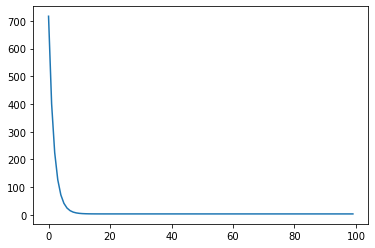

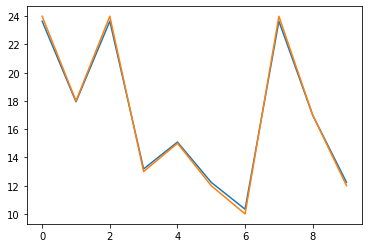

2.2212341525721633

In [152]:
L = LinearRegression(speed, dist, alpha=10**(-3))
L.RegressionLearning()
res = L.Prediction()
res['L2']

In [158]:
def CrossValidatonScore(model, X, Y, folds=5):
    # Split the data into k folds.
    CVS_X = CrossValidationSplit(X, folds=folds)
    CVS_Y = CrossValidationSplit(Y, folds=folds)
    # Split data in each fold into test and training set.
    score = {'R2':0, 'L1':0, 'L2':0}
    for i in range(folds):
        m = model(CVS_X[i], CVS_Y[i], alpha=10**(-3))
        m.RegressionLearning()
        performance = m.Prediction()
        score['R2'] += performance['r2-value']
        score['L1'] += performance['L1']
        score['L2'] += performance['L2']
    return score

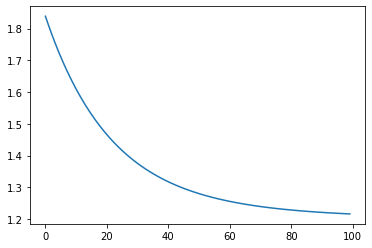

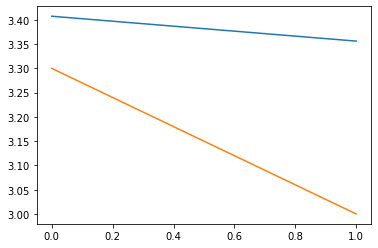

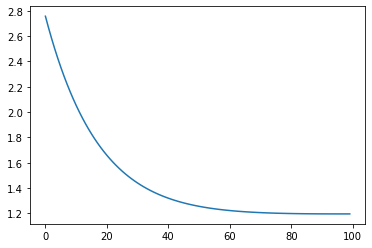

C:\Users\lynch\Anaconda3\envs\ENV\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\lynch\Anaconda3\envs\ENV\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


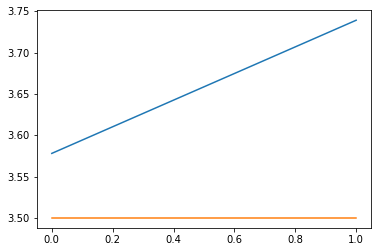

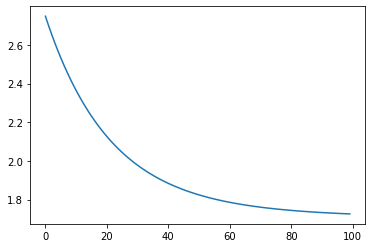

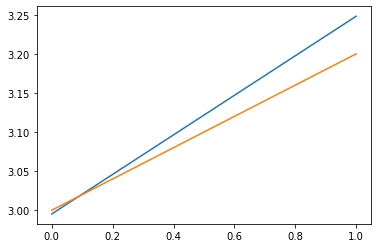

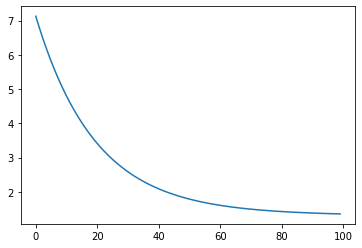

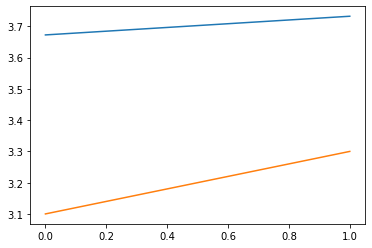

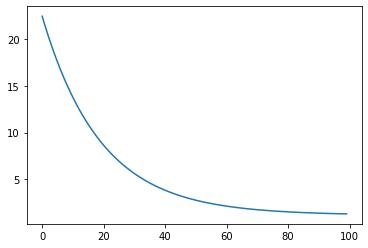

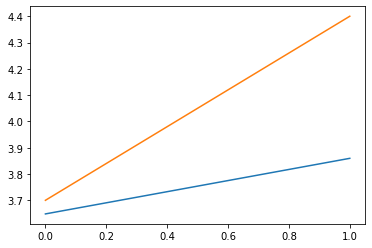

{'R2': array([[ 5., nan],
       [nan, nan]]), 'L1': 3.6799687730034356, 'L2': 6.121386805615161}


In [159]:
model = LinearRegression
s = CrossValidatonScore(model, X, Y, folds=5)
print(s)